### 6개 알고리즘 적용, 학습/예측/평가를 수행

1. logistic Regression : 반응변수가 1또는 0인 이진형 변수에서 쓰이는 회귀분석 방법으로 종속변수에 로짓변환을 실시하기 때문에 로지스틱 회귀분석이라고 불리며 우선계수가 Log Odds ratio가 되기 때문에 해석이 매우 편리하고, case-control과 같이 반응 변수에 따라 샘플링된 데이터에 대해서 편의(bias)가 없는 타당한 계수 추정치를 계산할 수 있다. 
  
2. decision tree : ML 알고리즘 중 직관적으로 이해하기 쉬운 알고리즘으로 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만드는 것.가장 쉽게 표현하는 규칙의 방법은 if/else 기반으로 나타내는 것. 루트노드(가장 처음노드), 규칙노드(if/else가 써있는 노드), 리프노드(결정된 분류값)로 나뉜다.  
  
- 앙상블 학습 : 여러개의 분류기(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법으로 Voting(서로 다른 종류의 알고리즘을 여러개 사용), Bagging(같은 알고리즘으로 여러개의 분류기를 만들어 보팅으로 최종 결정하는 알고리즘), Boosting의 방법이 있다.   
  
    3. Random Forest :배깅의 대표적인 알고리즘으로 앙상블 알고리즘 중 비교적 빠른 수행 속도를 가지고 있으며 결정 트리를 기반 알고리즘으로 두고 있다. 복원추출방식
  
    4. Gradient Boosting Machine : Boosting 알고리즘으로 여러개의 약한 학습기(weak learner)를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식이다.
  
5. K-Nearest Neighbors Machine : 정상값들과 떨어진 위치에 있는 이상값을 탐지해내는 방법이다. 연속형 변수에 대해서는 유클리드 거리를 사용하고 범주형 변수에 대해서는 단순 일치 계수를 사용한다. 
  
6. Support Vector Machine : 데이터를 정확히 분류하는 범위를 먼저 찾고, 그 범위 안에서 margin(선과 가장 가까운 양 옆 데이터와의 거리)를 최대화 하는 구분선을 선택한다. 데이터간에 그려지는 결정 경계는 마진을 최대화 하며 n개의 속성을 가진 데이터에는 최소 n+1개의 서포트 벡터가 존재한다.  

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings('ignore')
from sklearn.datasets import load_breast_cancer, load_iris

cancer = load_breast_cancer()
iris = load_iris()

print(cancer.keys())
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [2]:
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [37]:
# 1) logistic regression
from sklearn.linear_model import LogisticRegression

lc_clf = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                test_size=0.2,
                                                random_state=11)

lc_clf.fit(X_train, y_train)
lc_pred = lc_clf.predict(X_test)
name = lc_clf.__class__.__name__
print('{} 정확도 : {:.3f}'.format(name,accuracy_score(y_test, lc_pred)))

LogisticRegression 정확도 : 0.939


In [11]:
# 2) Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=3,random_state=156)

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                            test_size=0.2,
                                            random_state=11)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
name = dt_clf.__class__.__name__
print('{} 정확도 : {:.3f}'.format(name, accuracy_score(y_test, dt_pred)))


DecisionTreeClassifier 정확도 : 0.965


In [5]:
print(cancer.target_names)
print(cancer.feature_names)

['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


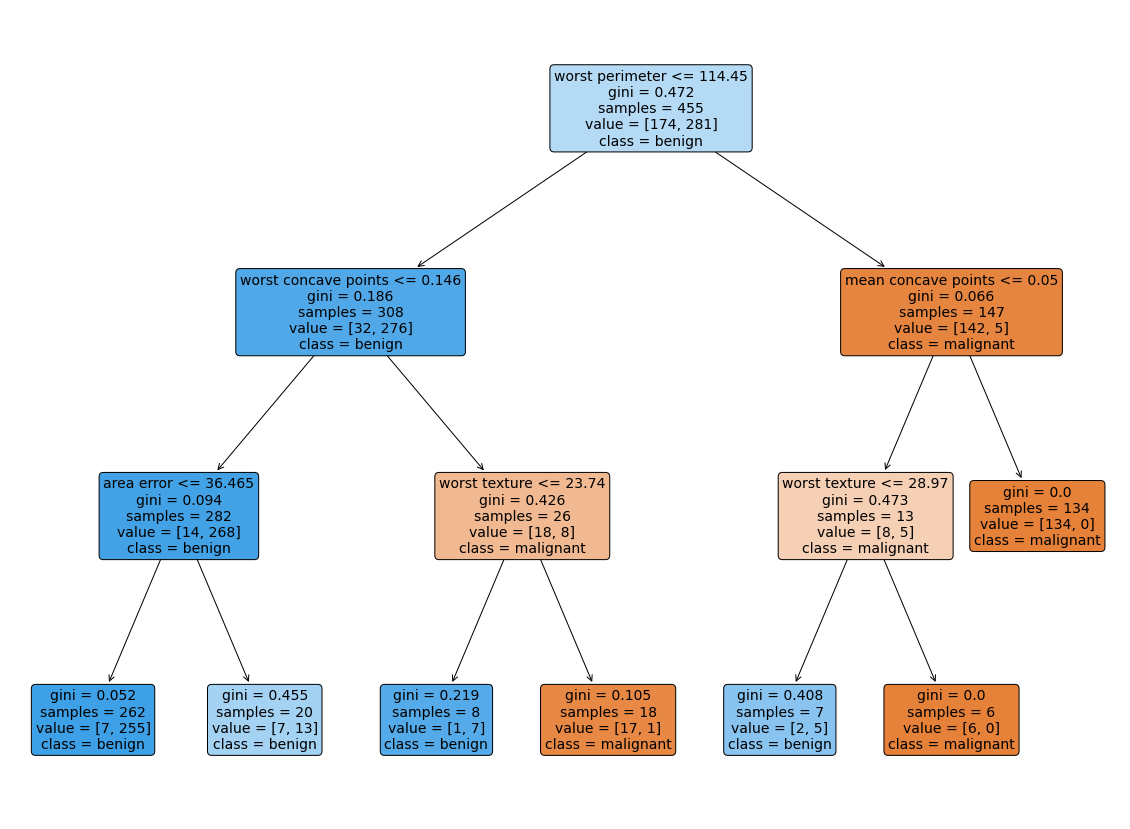

In [12]:
from sklearn import tree
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,15))
tree.plot_tree(dt_clf, filled=True, feature_names=cancer.feature_names, class_names=cancer.target_names,rounded=True, fontsize=14)
plt.show()

In [35]:
# 3) Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                            test_size=0.2,
                                            random_state=11)

rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
name = rf_clf.__class__.__name__
print('{} 정확도 : {:.3f}'.format(name, accuracy_score(y_test, rf_pred)))

RandomForestClassifier 정확도 : 0.982


In [27]:
#  4) K-Nearest Neighbor Model
from sklearn.neighbors import KNeighborsClassifier

knn_clf= KNeighborsClassifier()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                            test_size=0.2,
                                            random_state=11)

knn_clf.fit(X_train, y_train)
knn_pred = knn_clf.predict(X_test)
name = knn_clf.__class__.__name__
print('{} 정확도 : {:.3f}'.format(name, accuracy_score(y_test, knn_pred)))

KNeighborsClassifier 정확도 : 0.947


In [28]:
# 5) GBM
from sklearn.ensemble import GradientBoostingClassifier
gbm_clf = GradientBoostingClassifier()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                            test_size=0.2,
                                            random_state=11)

gbm_clf.fit(X_train, y_train)
gbm_pred = gbm_clf.predict(X_test)
name = gbm_clf.__class__.__name__
print('{} 정확도 : {:.3f}'.format(name, accuracy_score(y_test, gbm_pred)))


GradientBoostingClassifier 정확도 : 0.991


In [29]:
# 6) Support Vector Machine
from sklearn.svm import SVC
svm_clf = SVC()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                            test_size=0.2,
                                            random_state=11)

svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)
name = svm_clf.__class__.__name__
print('{} 정확도 : {:.3f}'.format(name, accuracy_score(y_test, svm_pred)))

SVC 정확도 : 0.930


In [14]:
# 짬뽕
# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier()

vo_clf = VotingClassifier(estimators=[('LR',lr_clf), ('KNN',knn_clf)], voting='soft')
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    test_size=0.2,
                                                    random_state=156)
vo_clf.fit(X_train, y_train)
vo_pred = vo_clf.predict(X_test)
print('정확도 : {:.3f}'.format(accuracy_score(y_test, vo_pred)))

정확도 : 0.947


In [16]:
pred_proba = lr_clf.predict_proba(X_test)
pred_proba[:3]

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# 교차검증 + 파라미터도 바꾸고 아무튼 다양한거를 시뮬레이션 하면서 한 번에 설정하는데 시간이 굉장히 오래걸림
# **주의** 부스팅 방식이랑 같이 사용하면 최소 30분~1시간이 걸림
from sklearn.model_selection import GridSearchCV

params = {'n_estimators' : [100,200],
        'learning_rate' : [0.05, 0.1],
        }
grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1) #param은 2개씩 총 4개, cv까지 해서 4*2 = 8개
grid_cv.fit(X_train, y_train) #손실이 가장 낮은 최적의 파라미터를 구해줌

print('최적 하이퍼 파라미터 :\n', grid_cv.best_params_) #파라미터는 정해주는 것 계수랑 절편. 하이퍼파라미터는 내가 정해주는 것
print('최고 예측 정확도 : {:.4f}'.format(grid_cv.best_score_))